## imports

In [1]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

# Module to load MATLAB .mat datafile format (Input and output module of scipy)
# from scipy.io import loadmat
import pandas as pd

# figure size, dpi and font size
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 14

- let's load the train and test data

In [2]:
train_fashion = pd.read_csv('data/fashion-mnist_train.csv')
test_fashion = pd.read_csv('data/fashion-mnist_test.csv')

train_fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# shape of the data
print('Shape of the training data: ', train_fashion.shape)
print('Shape of the test data: ', test_fashion.shape)

Shape of the training data:  (10000, 785)
Shape of the test data:  (30, 785)


### Visualize the data randomly

In [4]:
import matplotlib.pyplot as plt

def plot_same_label_grid(n, df):
    labels = df['label'].unique()
    fig, axes = plt.subplots(len(labels), n, figsize=(10, 10))
    for i, label in enumerate(labels):
        selected_rows = df[df['label'] == label]
        for j in range(n):
            selected_row = selected_rows.sample(1)
            axes[i, j].imshow(selected_row.drop('label', axis=1).values.reshape(28,28), cmap='gray')
            axes[i, j].axis('off')
        
    return fig

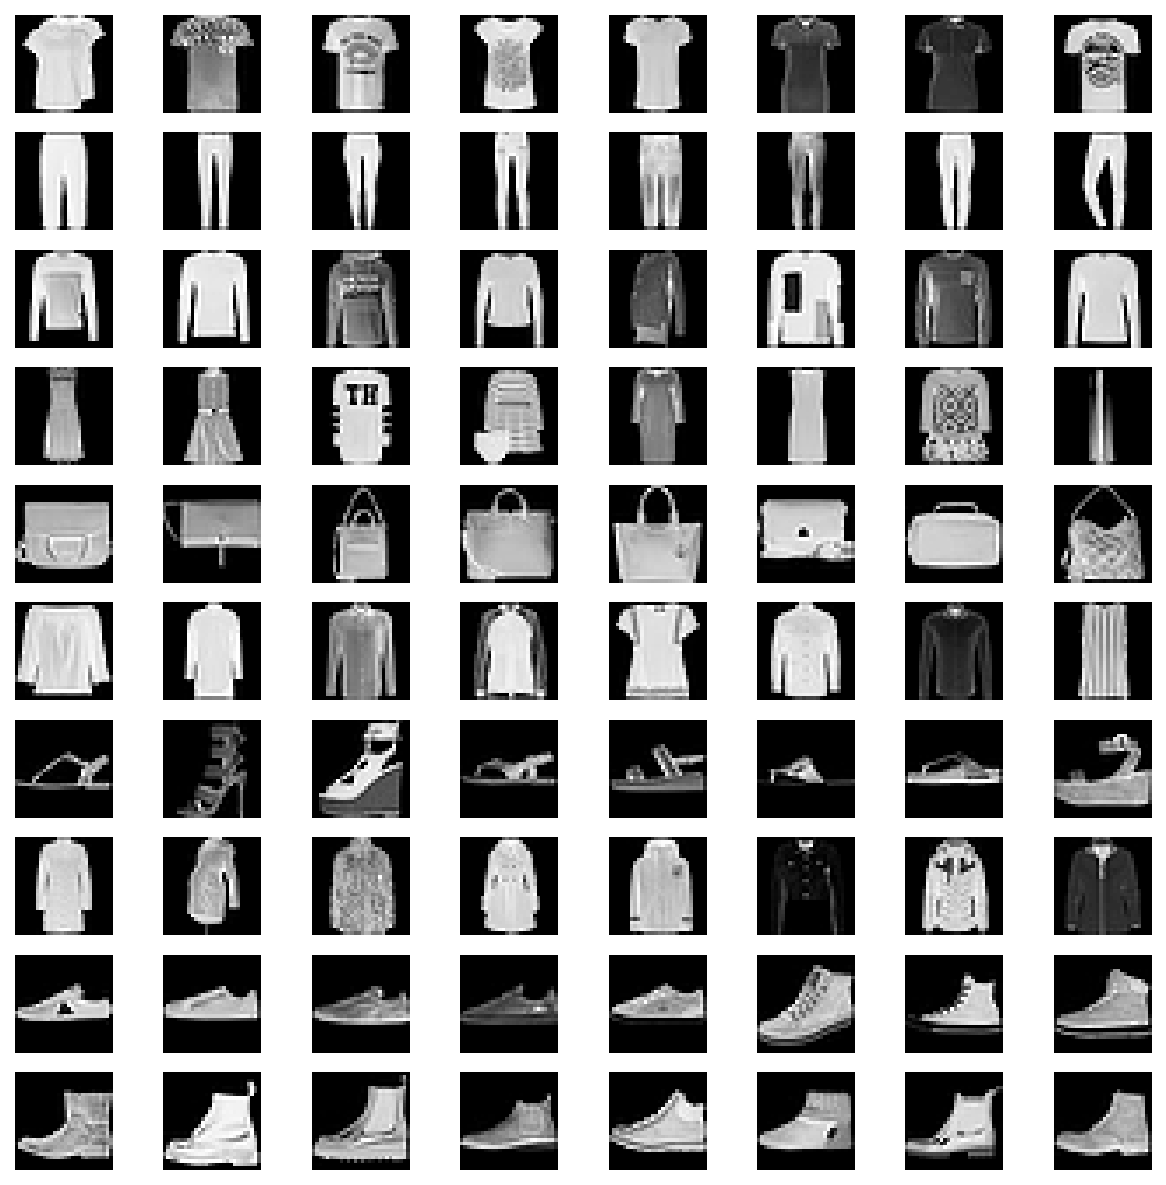

In [5]:
fig = plot_same_label_grid(n=8, df=train_fashion)
fig.savefig('0201.png')

### Normalizing the data

Normalizing all the features by scaling them between 0 and 1

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [6]:
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

In [7]:
for col in train_fashion.columns:
    if col != "label":
        train_fashion[col] = normalize(train_fashion[col])
        test_fashion[col] = normalize(test_fashion[col])

In [8]:
train_fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.041284,0.032787,...,0.405512,0.345238,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.133858,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.05668,0.243119,0.405738,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.129167,0.000000,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.539370,0.500000,0.549020,0.0,0.521569,0.878431,0.925000,0.248889,0.0,0.0
4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


- Split the data into features and labels

In [10]:
# split the data into X and y
X_train = train_fashion.drop('label', axis=1)
y_train = train_fashion['label']

X_test = test_fashion.drop('label', axis=1)
y_test = test_fashion['label']

## Softmax

Softmax: In Softmax, we calculate the probability of each class. The probability of each class is given by:

$$P(y_i = j) = \frac{e^{z_{ij}}}{\sum_{k=1}^{K}e^{z_{ik}}}$$

where $z_{ij}$ is the score of the $j^{th}$ class for the $i^{th}$ data point.

Herer we have used the stable version of softmax to avoid overflow. which is given by:

$$P(y_i = j) = \frac{e^{z_{ij} - c}}{\sum_{k=1}^{K}e^{z_{ik} - c}}$$
    
    where $c$ is the maximum value of $z_{ij}$.
$z_{ij}$ is given by:

$$z_{ij} = w_{ij}x_{i} + b_{j}$$

where $w_{ij}$ is the weight of the $j^{th}$ class for the $i^{th}$ data point and $b_{j}$ is the bias of the $j^{th}$ class.




### Cross Entropy Loss

Cross Entropy Loss: Cross entropy loss is used to calculate the loss between the predicted probability distribution and the true distribution. The loss is given by:

$$L = -\frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{K}y_{ij}log(p_{ij})$$

where $y_{ij}$ is the true label of the $j^{th}$ class for the $i^{th}$ data point and $p_{ij}$ is the predicted probability of the $j^{th}$ class for the $i^{th}$ data point.

### Gradient of Cross Entropy Loss

The gradient of the cross entropy loss is given by:

$$\frac{\partial L}{\partial w_{ij}} = -\frac{1}{N}\sum_{i=1}^{N}(y_{ij} - p_{ij})x_{i}$$

- This gradient is used to update the weights of the model.

### Gradient Descent

Gradient descent isthe optimization algorithm used to update the weights of the model. The weights are updated by:

$$w_{ij} = w_{ij} - \alpha\frac{\partial L}{\partial w_{ij}}$$

where $\alpha$ is the learning rate.

- Let's train a model by importing SoftmaxLogisticReg

In [1]:
import pandas as pd
from GradientDescent import SoftmaxLogisticReg 
import matplotlib.pyplot as plt

train_fashion = pd.read_csv('data/fashion-mnist_train.csv')
test_fashion = pd.read_csv('data/fashion-mnist_test.csv')

train = pd.read_csv('data/train.csv')

X_train = train.drop('label', axis=1)
y_train = train['label']

In [2]:
softmax = SoftmaxLogisticReg(alpha=0.01, max_iter=100, bias=True,
                             n_classes=10, penalty='l2', lambda_=0.5) 

softmax.fit(X_train, y_train)

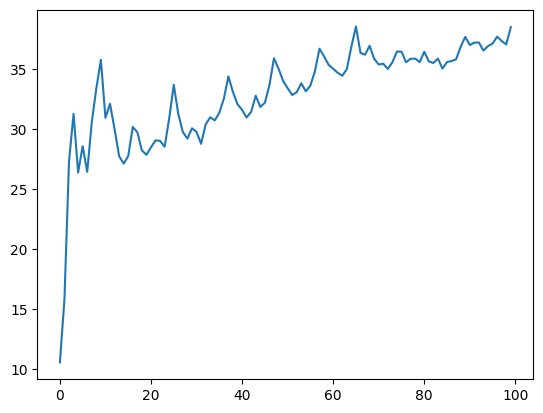

In [3]:
plt.plot(softmax.loss_history)

In [6]:
softmax.accuracy(softmax.predict(X_train), y_train)

0.1

In [7]:
len(softmax.loss_history)

100